<a href="https://colab.research.google.com/github/AlbertChen7/nbamvppredictor/blob/main/bbmvppred_playrsscraped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [45]:
all_mvp_stats = pd.DataFrame()

year = 2022
for i in range(10):
    # Define the URLs for the MVP voting and advanced stats pages
    mvp_url = f'https://www.basketball-reference.com/awards/awards_{year}.html'
    advanced_url = f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html'

    # Read the MVP voting page and extract the table of MVP vote getters
    mvp_table = pd.read_html(mvp_url, header=1)[0][0:5]
    mvp_table = mvp_table[['Player', 'G', 'PTS', 'TRB', 'AST', 'WS', 'WS/48', 'Share']]

    # Read the advanced stats page and extract the table of player stats
    advanced_table = pd.read_html(advanced_url, attrs={'id': 'advanced_stats'})[0]
    advanced_table = advanced_table[['Player', 'PER']]

    # Merge the two tables on the 'Player' column
    mvp_stats = pd.merge(mvp_table, advanced_table, on='Player')
    
    all_mvp_stats = pd.concat([all_mvp_stats, mvp_stats])

    # Print the final table
    #print(merged_table)
    year -= 1

all_mvp_stats = all_mvp_stats[['Player', 'G', 'PTS', 'TRB', 'AST', 'PER', 'WS', 'WS/48', 'Share']]
print(all_mvp_stats)
features = ['G', 'PTS', 'TRB', 'AST', 'PER', 'WS', 'WS/48']
X_train = all_mvp_stats[features]
y_train = all_mvp_stats['Share']


                  Player   G   PTS   TRB   AST   PER    WS  WS/48  Share
0           Nikola Jokić  74  27.1  13.8   7.9  32.8  15.2  0.296  0.875
1            Joel Embiid  68  30.6  11.7   4.2  31.2  12.0  0.252  0.706
2  Giannis Antetokounmpo  67  29.9  11.6   5.8  32.1  12.9  0.281  0.595
3           Devin Booker  68  26.8   5.0   4.8  21.3   7.6  0.156  0.216
4            Luka Dončić  65  28.4   9.1   8.7  25.1   7.6  0.159  0.146
0           Nikola Jokić  72  26.4  10.8   8.3  31.3  15.6  0.301  0.961
1            Joel Embiid  51  28.5  10.6   2.8  30.3   8.8  0.266  0.580
2          Stephen Curry  63  32.0   5.5   5.8  26.3   9.0  0.201  0.449
3  Giannis Antetokounmpo  61  28.1  11.0   5.9  29.2  10.2  0.244  0.345
4             Chris Paul  70  16.4   4.5   8.9  21.4   9.2  0.201  0.138
0  Giannis Antetokounmpo  63  29.5  13.6   5.6  31.9  11.1  0.279  0.952
1           LeBron James  67  25.3   7.8  10.2  25.5   9.8  0.204  0.746
2           James Harden  68  34.3   6.6   7.5  29.

In [46]:
# Select season to predict on (Put final year: So if 2022-23 season, put 2023)
season = 2018

In [47]:
# Define the URL to scrape
url_base = f'https://www.basketball-reference.com/leagues/NBA_{season}_per_game.html'

# Use pandas to read in the HTML table into a dataframe
df_standard = pd.read_html(url_base)[0]

# Select only the columns you want
cols_to_keep = ['Player', 'G', 'PTS', 'TRB', 'AST']
df_base = df_standard[cols_to_keep]

url_adv = f'https://www.basketball-reference.com/leagues/NBA_{season}_advanced.html'

df_advanced = pd.read_html(url_adv)[0]

# Select only the columns you want
cols_to_keep = ['PER', 'WS', 'WS/48']
df_adv = df_advanced[cols_to_keep]

playerstats = pd.concat([df_base, df_adv], axis=1)

# Check if any of the rows have the same values as the column names
col_names = playerstats.columns.tolist()
drop_indices = []
for i, row in playerstats.iterrows():
    if any(row == col_names):
        drop_indices.append(i)

# Drop the rows with repeated column names
playerstats = playerstats.drop(drop_indices)
playerstats.to_csv('output.csv', index=False)
playerstats = pd.read_csv('output.csv')
print(playerstats[features])

      G   PTS  TRB  AST   PER   WS  WS/48
0    75   4.7  1.5  0.4   9.0  2.2  0.094
1    70   5.9  3.7  0.8   8.2  1.0  0.036
2    76  13.9  9.0  1.2  20.6  9.7  0.187
3    69   6.9  5.5  1.5  15.7  4.2  0.148
4    53   3.4  1.2  0.6   5.8  0.1  0.009
..   ..   ...  ...  ...   ...  ...    ...
659  42   7.1  4.6  0.7  15.3  1.5  0.105
660  24   5.9  4.6  0.8  17.1  1.4  0.163
661  54   4.0  2.4  0.9   5.2 -0.6 -0.034
662  32   3.7  1.9  0.2  24.2  1.0  0.231
663  43   3.7  2.9  0.6  15.3  1.0  0.118

[664 rows x 7 columns]


In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(playerstats[features])
for i in range(len(y_pred)):
    if 1 > y_pred[i] >= 0:
        print('Index: %s, Player: %s, Prediction: %s' % (i, playerstats['Player'][i], y_pred[i]))

Index: 6, Player: LaMarcus Aldridge, Prediction: 0.198692476983779
Index: 15, Player: Giannis Antetokounmpo, Prediction: 0.34812637149079073
Index: 82, Player: Anthony Brown, Prediction: 0.5723806340886819
Index: 103, Player: Clint Capela, Prediction: 0.1847937917883855
Index: 146, Player: Stephen Curry, Prediction: 0.3478274859080246
Index: 148, Player: Anthony Davis, Prediction: 0.49134342358270366
Index: 156, Player: DeMar DeRozan, Prediction: 0.06543636074734271
Index: 168, Player: Andre Drummond, Prediction: 0.17370216387691606
Index: 171, Player: Kevin Durant, Prediction: 0.27697262738213624
Index: 233, Player: James Harden, Prediction: 0.7654786374180897
Index: 293, Player: Kyrie Irving, Prediction: 0.12466566820074565
Index: 304, Player: LeBron James, Prediction: 0.5367315000494153
Index: 325, Player: Nikola Jokić, Prediction: 0.26323908864486745
Index: 334, Player: DeAndre Jordan, Prediction: 0.06415385486179659
Index: 369, Player: Damian Lillard, Prediction: 0.360571681732878

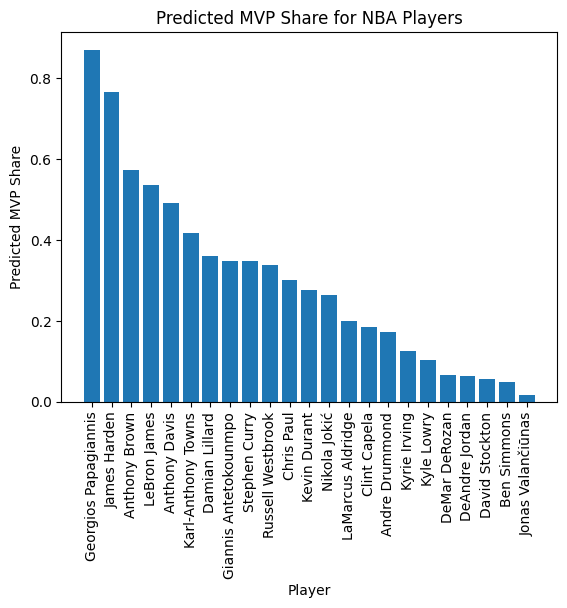

In [51]:
# Create a list of player names and their corresponding predicted values
player_predictions = []
for i in range(len(y_pred)):
    if 1 > y_pred[i] >= 0:
        player_predictions.append((playerstats['Player'][i], y_pred[i]))

#player_predictions = [(playerstats['Player'][i], y_pred[i]) for i in range(len(y_pred)) if y_pred[i] >= 0]

# Sort the list in descending order based on the predicted values
player_predictions.sort(key=lambda x: x[1], reverse=True)

# Separate the player names and predicted values into two separate lists
player_names = [x[0] for x in player_predictions]
predicted_values = [x[1] for x in player_predictions]

# Create a bar chart of the predicted values for each player
plt.bar(range(len(predicted_values)), predicted_values)

# Add the player names as x-tick labels
plt.xticks(range(len(player_names)), player_names, rotation=90)

# Add labels to the chart
plt.xlabel('Player')
plt.ylabel('Predicted MVP Share')
plt.title('Predicted MVP Share for NBA Players')

# Display the chart
plt.show()